<a href="https://colab.research.google.com/github/myredex/text_to_image/blob/master/01_SD_XL_diffusers_LoRA_apusher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train LoRA on Stable Diffusion XL
Tested on L4, predicts on T4 GPU

## Download files

In [ ]:
# Libs
!pip install bitsandbytes transformers accelerate wandb xformers peft -q

# Diffusers
!pip install git+https://github.com/huggingface/diffusers.git -q

# Data
!gdown 1YGi43jnAewNBX6a3dOm4rwh9aksFoqH3

# Scripts
!wget https://raw.githubusercontent.com/huggingface/diffusers/main/examples/text_to_image/train_text_to_image_lora_sdxl.py
!wget https://raw.githubusercontent.com/huggingface/diffusers/main/examples/text_to_image/requirements_sdxl.txt
!wget https://github.com/myredex/functions/raw/master/files_helpers_functions.py

from files_helpers_functions import unzip_data

# unzip data
unzip_data('train_bg.zip')

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Downloading...
From (original): https://drive.google.com/uc?id=1YGi43jnAewNBX6a3dOm4rwh9aksFoqH3
From (redirected): https://drive.google.com/uc?id=1YGi43jnAewNBX6a3dOm4rwh9aksFoqH3&confirm=t&uuid=f07c0363-83e9-4b98-a61b-ae412a6ed5a8
To: /content/train_bg.zip
100% 87.4M/87.4M [00:00<00:00, 221MB/s]
--2024-09-27 09:58:57--  https://raw.githubusercontent.com/huggingface/diffusers/main/examples/text_to_image/train_text_to_image_lora_sdxl.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55573 (54K) [text/plain]
Saving to: ‘train_text_to_image_lora_sdxl.py.1’

train_text_to_image 100%[===================>]  54.27K  --.-KB/s    in

In [ ]:
# Install required libs
!pip install -r requirements_sdxl.txt

# Set locale to UTF-8
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# Set accelerate config to default
!accelerate config default

# Login into Hugging Face
from huggingface_hub import notebook_login
notebook_login()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: peft
    Found existing installation: peft 0.13.0
    Uninstalling peft-0.13.0:
      Successfully uninstalled peft-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sourc

## Train LoRA

In [ ]:
# Run training
!accelerate launch train_text_to_image_lora_sdxl.py \
  --pretrained_model_name_or_path="stabilityai/stable-diffusion-xl-base-1.0" \
  --pretrained_vae_model_name_or_path="madebyollin/sdxl-vae-fp16-fix" \
  --train_data_dir="/content/train_bg" \
  --resolution=512 --random_flip \
  --train_batch_size=2 \
  --num_train_epochs=1 --checkpointing_steps=100 \
  --learning_rate=1e-04 --lr_scheduler="constant" --lr_warmup_steps=0 \
  --mixed_precision="fp16" \
  --output_dir="sdxl-lora-apusher-700_files_1_ep_youtube" \
  --push_to_hub \
  --validation_prompt="_apusher_ smiles" \
  --validation_epochs=1 \
  --seed="0" \
  --report_to="wandb"

2024-09-27 09:40:37.246211: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-27 09:40:37.268399: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-27 09:40:37.275179: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-27 09:40:37.291306: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-27 09:40:38.441392: W tensorflow/compiler/tf2

## Run model
* note, it doesnt work right after training. You have to restart runtime.

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

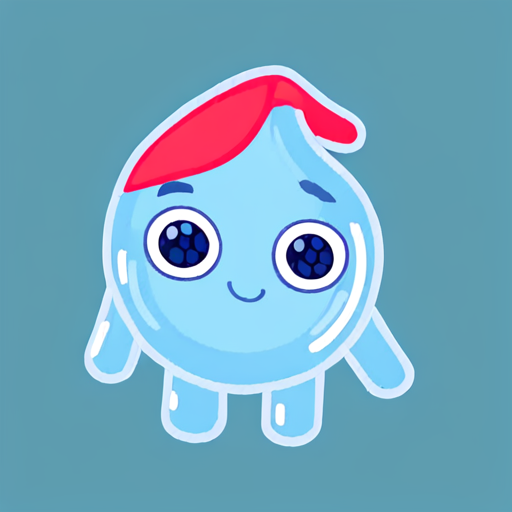

In [ ]:
import torch
from diffusers import DiffusionPipeline, AutoencoderKL

vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix",
                                    torch_dtype=torch.float16)

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0",
                                         torch_dtype=torch.float16,
                                         vae=vae)

seed = 22
generator = torch.Generator(device="cuda").manual_seed(seed)

repo_id = "talikbayev/sdxl-lora-apusher-700_files_1_ep"

# pipe.unet.load_attn_procs("/content/model") # For local
pipe.load_lora_weights(repo_id)
_ = pipe.to("cuda")

# Academic Art, Abstract, Expressionism,
prompt = "_apusher_ in red hat"
result = pipe(prompt,
             num_inference_steps=70,
             guidance_scale=7.5,
             height=512,
             width=512,
             generator=generator
             )
image = result.images[0]
image.save("apusher.png")
image